# MACHINE LEARNING LAB

## EXERCISE 1.1

### Aim : 
Create a random 2-D numpy array with 1500 values. Simulate different lines of fit using 1000 values from the array and find the errors for each of these lines. Find the line with the least error among these lines and store it as the line of best fit. Using this line of best fit, predict the target variable for the other 500 values.

### Algorithm : 
Sure, here's the algorithm described in five steps:

1. **Generate Data**: Create a 2-D numpy array with 1500 random values.
2. **Fit Lines and Calculate Errors**:
   - Loop 1000 times:
     - Select first 1000 values from the array.
     - Fit a linear regression model using the selected values.
     - Predict the target variable for all 1500 values.
     - Calculate the mean squared error between the predicted and actual target values.
     - Choose the line of best fit.
3. **Identify Line of Best Fit**:
   - The line with the smallest mean squared error among all iterations is considered the line of best fit.
4. **Predict Target Variable**:
   - Using the line of best fit, predict the target variable for the remaining 500 values.
5. **Output**:
   - Present the predictions for the other 500 values.
   - Also print the best fit line slope, intercept and error

### Code and Output : 

In [2]:
#Importing libraries
#creating array - numpy
#lines of fit, line of best fit, least error - linear regression, mse
#plotting lines - matplotlib
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

C:\Users\TEJU\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [21]:
x=42
np.random.seed(x)
#So this initialises the random number generator. If you call with the same number twice, same set will be generated. 
ds=np.random.rand(1500,2)
#So this creates random values uniformly distributed between between 0 and 5
print(ds[5])

[0.02058449 0.96990985]


In [22]:
#All rows and 1st column in X
X = ds[:, 0]
#All rows and 2nd column in y
y = ds[:, 1]
#personal - X is independent so captital, y is dependent so small

In [23]:
#train set should be 1000 points, xtrain takes from 0 to upto num points
num_points = 1000
#we want to reshape training dataset such that number of rows is number of data points and number of columns is just 1
X_train = X[:num_points].reshape(-1, 1)
y_train = y[:num_points]
errors = []

In [24]:
for i in range(1000):
    #creating values for slope and intercept
    slope = np.random.rand() * 2 - 1
    intercept = np.random.rand() * 2 - 1
    #Linear Regression
    model=LinearRegression()
    #fitting model
    model.fit(X_train,slope*X_train+intercept)
    #predicting what will be y values for given x values and finding errors
    y_pred=model.predict(X_train)
    error=mean_squared_error(y_train,y_pred)
    errors.append((slope,intercept,error))

In [25]:
#finding best fit line as min mse, key to point to the error variable
best_fit_line=min(errors,key=lambda x:x[2])

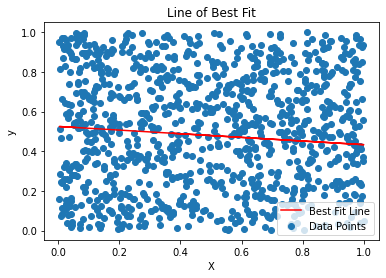

In [26]:
#each point refers to a xtrain and ytrain pair
plt.scatter(X_train, y_train, label='Data Points')
#we are plotting the best fit line : x is xtrain and y is mx+c
plt.plot(X_train, best_fit_line[0] * X_train + best_fit_line[1], color='red', label='Best Fit Line')
plt.title('Line of Best Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [32]:
#now predicting y values for the rest 500 points based on this best line of bit
#it takes from numpoints upto end of the array
X_test = X[num_points:].reshape(-1, 1)
y_test=y[num_points:]
y_test_pred = best_fit_line[0] * X_test + best_fit_line[1]

In [30]:
#let us try printing the first 5 y test predicted points values
print(y_test_pred[:5])

[[0.50081171]
 [0.44150021]
 [0.49986906]
 [0.48350878]
 [0.51887891]]


In [39]:
print("Slope:",best_fit_line[0])

Slope: -0.092020177600602


In [40]:
print("Intercept:",best_fit_line[1])

Intercept: 0.5248939173497369


In [41]:
print("Error:",best_fit_line[2])

Error: 0.08303640690346432


### Result : 
Therefore, we were successfully able to find the line of best fit using 1000 values and predict the target variable for the other 500 values